### 前言
    计算机视觉是一门对图像中信息进行自动提取的学科。信息的内容相当广泛，包括三维模型、照相机位置、目标检测与识别，以及图像内容的分组与搜索等。此书中，我们使用广义的计算机视觉概念，包括图像扭曲、降噪和增强现实等。

# 第一章 基本的图像操作和处理

## PIL：Python图像处理类库
    PIL（Python Imaging Library，图像处理类库）提供了通用的图像处理功能，以及大量有用的基本图像操作，比如图像缩放、裁剪、旋转、颜色转换等。PIL 是免费的，可以从 http://www.pythonware.com/products/pil/ 下载。

读入一副图像

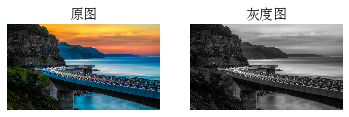

In [39]:
from PIL import Image
from pylab import *

# 添加中文字体支持
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)

figure()
#Image.open 读入一副图像，代码的返回值 pil_im 是一个 PIL 图像对象
pil_im = Image.open('D:\\学习文件\\CV\\test_jpg\\bridge.jpg')
gray()
subplot(121)#画在一行两列的两幅图中的第一幅 
#subplot(a,b,c)中a代表所画图形的行数
#b代表所画图形的列数
#c代表所画图形的序号 
title(u'原图',fontproperties=font)
axis('off')
imshow(pil_im)

#要读取一幅图像，并将其转换成灰度图像，只需要加上 convert('L')
pil_im = Image.open('D:\\学习文件\\CV\\test_jpg\\bridge.jpg').convert('L')
subplot(122)
title(u'灰度图',fontproperties=font)
axis('off')
imshow(pil_im)

show()


### 转换图像格式——save()函数

In [12]:
# from PCV.tools.imtools import get_imlist #导入原书的PCV模块  python2.6版本 

In [13]:
from PIL import Image
import os
import pickle
filelist = os.listdir('D:\\学习文件\\CV\\test_jpg\\')#获取文件夹下的图片文件名(包括后缀名)
#filelist = get_imlist('D:\\学习文件\\CV\\test_jpg\\') #获取文件夹下的图片文件名(包括后缀名)
imlist = open('D:\\学习文件\\CV\\test_jpg\\imlist.txt','wb+')#将获取的图片文件列表保存到imlist.txt中
pickle.dump(filelist,imlist) #序列化
imlist.close()

In [68]:
for infile in filelist:
    outfile = os.path.splitext(infile)[0] + ".png" #分离文件名与扩展名
    if infile != outfile:
        try:
            Image.open('D:\\学习文件\\CV\\test_jpg\\'+infile).save('D:\\学习文件\\CV\\test_jpg\\'+outfile)
        except IOError:
            print ("cannot convert", infile)

cannot convert imlist.txt


In [16]:
os.path.splitext(infile)[0]

'marvel_thumbnail'

In [65]:
filelist

['1558511986(1).jpg',
 '1558512015(1).jpg',
 'A.jpg',
 'bee.jpg',
 'bridge.jpg',
 'bridge_thumbnail.jpg',
 'build.jpg',
 'daren.jpg',
 'imlist.txt',
 'm.jpg',
 'marvel.jpg',
 'marvel_thumbnail.jpg']

    其中，test_jpg文件夹是自己建立的文件夹，存放测试的**.jpg图像，源代码证添加了部分代码以便将获取的图像文件名保存下来，同时将所有的图像转化为.png格式，PIL中的open()函数用于创建PIL图像对象，sace()方法用于保存图片到指定文件名的文件夹，上述过程将后缀变为.png，但文件名不变

### 创建缩略图
    利用PIL可以很容易地创建缩略图，设置缩略图的大小，并用元祖保存起来，调用thumbnail()方法即可生成缩略图。

In [41]:
#创建最长边为128像素的缩略图
pil_im.thumbnail((128,128))

### 复制并粘贴图像区域
    调用crop()方法即可从一幅图像中进行区域拷贝，拷贝出区域后，可以对区域进行旋转等变换。

In [22]:
box = (100,100,400,400)
region = pil_im.crop(box)

    该区域使用四元组来指定。四元组的坐标依次是（左，上，右，下）。PIL 中指定坐标系的左上角坐标为（0，0）。我们可以旋转上面代码中获取的区域，然后使用paste()方法将该区域放回去，具体实现如下：

In [23]:
region = region.transpose(Image.ROTATE_180)
pil_im.paste(region,box)

### 调整尺寸和旋转
    *调整尺寸：利用resize()方法，参数是一个元组，用来指定新图像的大小：

In [ ]:
out = pil_im.resize((128,128))

    *旋转：利用rotate()方法，逆时针方式表示角度

In [24]:
out = pil_im.rotate(45)

RGB (1269, 952) JPEG
(128, 96)
(128, 128)


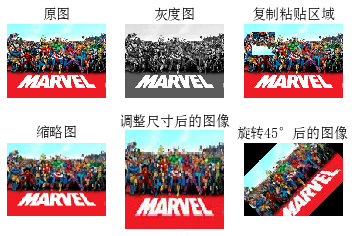

In [43]:
from PIL import Image
from pylab import *

# 添加中文字体支持
from matplotlib.font_manager import FontProperties

font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)
figure()

# 显示原图
pil_im = Image.open('D:\\学习文件\\CV\\test_jpg\\marvel.jpg')
print(pil_im.mode, pil_im.size, pil_im.format)
subplot(231)
title(u'原图', fontproperties=font)
axis('off')
imshow(pil_im)

# 显示灰度图
pil_im = Image.open('D:\\学习文件\\CV\\test_jpg\\marvel.jpg').convert('L')
gray()
subplot(232)
title(u'灰度图', fontproperties=font)
axis('off')
imshow(pil_im)

# 复制并粘贴区域
pil_im = Image.open('D:\\学习文件\\CV\\test_jpg\\marvel.jpg')
box = (100, 100, 400, 400)
region = pil_im.crop(box)
region = region.transpose(Image.ROTATE_180)
pil_im.paste(region, box)
subplot(233)
title(u'复制粘贴区域', fontproperties=font)
axis('off')
imshow(pil_im)

# 缩略图
pil_im = Image.open('D:\\学习文件\\CV\\test_jpg\\marvel.jpg')
size = 128, 128
pil_im.thumbnail(size)
print(pil_im.size)
subplot(234)
title(u'缩略图', fontproperties=font)
axis('off')
imshow(pil_im)
pil_im.save('D:\\学习文件\\CV\\test_jpg\\marvel_thumbnail.jpg')# 保存缩略图

#调整图像尺寸
pil_im=Image.open('D:\\学习文件\\CV\\test_jpg\\marvel_thumbnail.jpg')
pil_im=pil_im.resize(size)
print(pil_im.size)
subplot(235)
title(u'调整尺寸后的图像',fontproperties=font)
axis('off')
imshow(pil_im)

#旋转图像45°
pil_im=Image.open('D:\\学习文件\\CV\\test_jpg\\marvel_thumbnail.jpg')
pil_im=pil_im.rotate(45)
subplot(236)
title(u'旋转45°后的图像',fontproperties=font)
axis('off')
imshow(pil_im)

show()

## Matplotlib库
    当在处理数学及绘图或在图像上描点、画直线、曲线时，Matplotlib是一个很好的绘图库，它比PIL库提供了更有力的特性。Matplotlib 是开源工具，可以从http://matplotlib.sourceforge.net/ 免费下载。该链接中包含非常详尽的使用说明和教程。
    
### 绘制图像、点和线

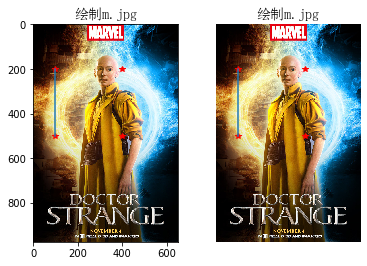

In [45]:
from PIL import Image
from pylab import *

# 添加中文字体支持
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)

# 读取图像到数组中
im = array(Image.open('D:\\学习文件\\CV\\test_jpg\\m.jpg'))
figure()

# 绘制有坐标轴的
subplot(121)
imshow(im)
x = [100, 100, 400, 400]
y = [200, 500, 200, 500]

# 使用红色星状标记绘制点
plot(x, y, 'r*')

# 绘制连接两个点的线（默认为蓝色）
plot(x[:2], y[:2])
title(u'绘制m.jpg', fontproperties=font)

# 不显示坐标轴的
subplot(122)
imshow(im)
x = [100, 100, 400, 400]
y = [200, 500, 200, 500]

plot(x, y, 'r*')
plot(x[:2], y[:2])
axis('off')#使坐标轴不显示
title(u'绘制m.jpg', fontproperties=font)

show()
# 注意，在 PyLab 库中，我们约定图像的左上角为坐标原点。
# show()命令首先打开图形用户界面（GUI），然后新建一个窗口，该图形用户界面会循环阻断脚本，然后暂停，
# 直到最后一个图像窗口关闭。每个脚本里，只能调用一次show()命令，通常相似脚本的结尾调用。

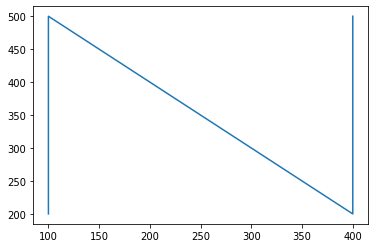

In [46]:
plot(x,y)   # 默认为蓝色实线

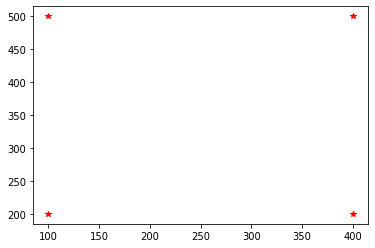

In [47]:
plot(x,y,'r*')   # 红色星状标记

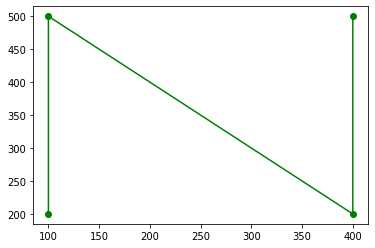

In [29]:
plot(x,y,'go-')   # 带有圆圈标记的绿线

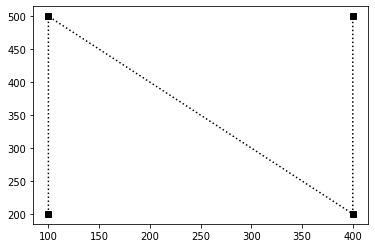

In [30]:
plot(x,y,'ks:')   # 带有正方形标记的黑色点线

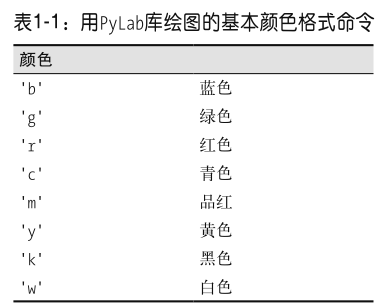
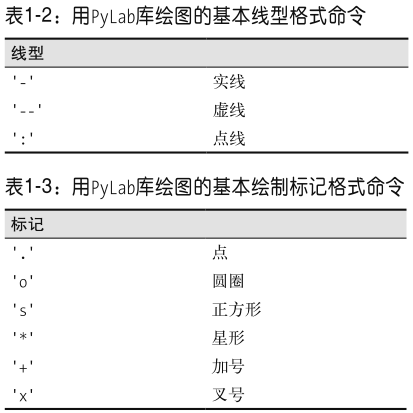

### 图像轮廓和直方图

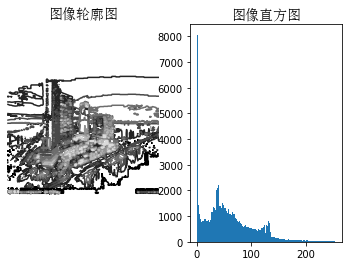

In [31]:
from PIL import Image
from pylab import *

# 添加中文字体支持
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)

# 打开图像，并转成灰度图像
im = array(Image.open('D:\\学习文件\\CV\\test_jpg\\build.jpg').convert('L'))

# 新建一个图像
figure()
subplot(121)
# 不使用颜色信息
gray()
# 在原点的左上角显示轮廓图像
contour(im, origin='image')
axis('equal')
axis('off')
title(u'图像轮廓图', fontproperties=font)

subplot(122)
# 利用hist来绘制直方图
# 第一个参数为一个一维数组
# 因为hist只接受一维数组作为输入，所以要用flatten()方法将任意数组按照行优先准则转化成一个一维数组
# 第二个参数指定bin的个数
hist(im.flatten(), 128)
title(u'图像直方图', fontproperties=font)
# plt.xlim([0,250])
# plt.ylim([0,12000])

show()

    先用 PIL 的 convert()方法将图像转换成灰度图像。图像的直方图用来表征该图像像素值的分布情况。用一定数目的小区间（bin）来指定表征像素值的范围，每个小区间会得到落入该小区间表示范围的像素数目。该（灰度）图像的直方图可以使用 hist()函数绘制，hist()函数的第二个参数指定小区间的数目。
    需要注意的是，因为 hist()只接受一维数组作为输入，所以我们在绘制图像直方图之前，必须先对图像进行压平处理。flatten() 方法将任意数组按照行优先准则转换成一维数组。上图为等轮廓线和直方图图像。

### 交互式标注
    有时候用户需要和应用进行交互，比如在图像中用点做标识，或者在一些训练数据中进行注释，PyLab提供了一个很简洁好用的函数gitput()来实现交互式标注。

Please click 3 points


D:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


you clicked: []


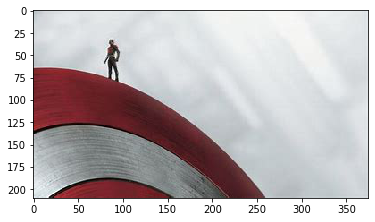

In [114]:
####cmd窗口跑
from PIL import Image
from pylab import *

im = array(Image.open('D:\\学习文件\\CV\\test_jpg\\A.jpg'))
imshow(im)

print('Please click 3 points')
x = ginput(3)
print('you clicked:', x)
show()
#终端

    上面代码先读取A.jpg图像，显示读取的图像，然后用ginput()交互注释，这里设置的交互注释数据点设置为3个，用户在注释后，会将注释点的坐标打印出来。

## Numpy
    NumPy是Python一个流行的用于科学计算包。它包含了很多诸如矢量、矩阵、图像等其他非常有用的对象和线性代数函数。NumPy 可以http://www.scipy.org/Download 免费下载，在线说明文档（http://docs.scipy.org/doc/numpy/） 包含了你可能遇到的大多数问题的答案。

### 图像数组表示
    在先前的例子中，当载入图像时，我们通过调用 array() 方法将图像转换成 NumPy 的数组对象，但当时并没有进行详细介绍。NumPy 中的数组对象是多维的，可以用来表示向量、矩阵和图像。一个数组对象很像一个列表（或者是列表的列表），但是数组中所有的元素必须具有相同的数据类型。除非创建数组对象时指定数据类型，否则数据类型会按照数据的类型自动确定。

In [37]:
from PIL import Image
from pylab import *

im = array(Image.open('D:\\学习文件\\CV\\test_jpg\\A.jpg'))
print (im.shape, im.dtype)
im = array(Image.open('D:\\学习文件\\CV\\test_jpg\\A.jpg').convert('L'),'f')
print (im.shape, im.dtype)

(210, 375, 3) uint8
(210, 375) float32


    第一个元组表示图像数组大小（行、列、颜色通道）,
    第二个字符串表示数组元素的数据类型，因为图像通常被编码为8位无符号整型（uint8）；
    1. uint8:默认类型
    2. float32:对图像进行灰度化，并添加了'f'参数，所以变为浮点型,又因为灰度图像没有颜色信息，所以在形状元组中，它只有两个数值。

    数组中的元素可以使用下标访问，value = im[i,j,k]：位于坐标 i、j，以及颜色通道 k 的像素值。
    多个数组元素可以使用数组切片方式访问。切片方式返回的是以指定间隔下标访问该数组的元素值：

im[i,:] = im[j,:]     #将第j行的数值赋值给第i行

im[:,j] = 100         #将第i列所有数值设为100

im[:100,:50].sum()    #计算前100行、前50列所有数值的和

im[50:100,50:100]     #50~100行，50~100列，不包含第100行和100列

im[i].mean()          #第i行所有数值的平均值

im[:,-1]              #最后一列

im[-2,:]/im[-2]       #倒数第二行

### 灰度变换
    将图像读入NumPy数组对象后，我们可以对它们执行任意数学操作，一个简单的例子就是图像的灰度变换，考虑任意函数f，它将0~255（或者0...1区间）映射到自身，也就是输出区间和输入区间相同。举例如下：

0 254
1 255
100 199
0 253


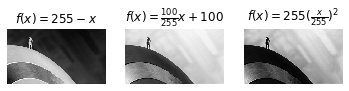

In [113]:
from PIL import Image
from numpy import *
from pylab import *

im=array(Image.open('D:\\学习文件\\CV\\test_jpg\\A.jpg').convert('L'))
print(int(im.min()),int(im.max()))

im2=255-im               #对图像进行反相处理
print(int(im2.min()),int(im2.max())) #查看最大/最小元素

im3=(100.0/255)*im+100   #将图像像素值变换到100...200区间
print(int(im3.min()),int(im3.max()))

im4=255.0*(im/255.0)**2  #对像素值求平方后得到的图像
print(int(im4.min()),int(im4.max()))

figure()
gray()
subplot(131)
imshow(im2)
axis('off')
title(r'$f(x)=255-x$')

subplot(132)
imshow(im3)
axis('off')
title(r'$f(x)=\frac{100}{255}x+100$')

subplot(133)
imshow(im4)
axis('off')
title(r'$f(x)=255(\frac{x}{255})^2$')

show()

    ·array变换的相反操作可以利用PIL的fromarray()函数来完成

In [89]:
pil_im=Image.fromarray(im)

    ·如果之前的操作将“uint8”数据类型转换为其他数据类型，比如之前例子中的im3 或者 im4，那么在创建 PIL 图像之前，需要将数据类型转换回来：

In [90]:
pil_im=Image.fromarray(uint8(im))

    ·如果你并不十分确定输入数据的类型，安全起见，应该先转换回来。注意，NumPy总是将数组数据类型转换成能够表示数据的“最低”数据类型。对浮点数做乘积或除法操作会使整数类型的数组变成浮点类型。

### 图像缩放
    NumPy数组将成为我们对图像及数据进行处理的最主要工具，但是调整矩阵大小并没有一种简单的方法。我们可以用PIL图像对象转换写一个简单的图像尺寸调整函数，并把这个调整函数添加到imtools.py文件中。

In [91]:
def imresize(im,sz):
    """    Resize an image array using PIL. """
    pil_im = Image.fromarray(uint8(im))

    return array(pil_im.resize(sz))

### 直方图均衡化
    直方图均衡化指将一幅图像的灰度直方图变平，使得变换后的图像中每个灰度值的分布概率都相同，该方法是对灰度值归一化的很好的方法，并且可以增强图像的对比度。如果一副图像的像素占有很多的灰度级而且分布均匀，那么这样的图像往往有高对比度和多变的灰度色调。直方图均衡化就是一种能仅靠输入图像直方图信息自动达到这种效果的变换函数。
    它的基本思想是对图像中像素个数多的灰度级进行展宽，而对图像中像素个数少的灰度进行压缩，从而扩展取值的动态范围，提高了对比度和灰度色调的变化，使图像更加清晰。
    ——相当于美图软件中的提高图像对比度
    在这种情况下，直方图均衡化的变换函数是图像中像素值的累积分布函数（cumulative distribution function，简写为 cdf，将像素值的范围映射到目标范围的归一化操作）。
    下面的函数是直方图均衡化的具体实现，将这个函数添加到 imtool.py 里：

In [103]:
# def histeq(im,nbr_bins=256):
#     """ 对一幅灰度图像进行直方图均衡化"""
#     # 计算图像的直方图
#     imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
#     cdf = imhist.cumsum()      # 累积分布函数
#     cdf = 255 * cdf / cdf[-1]  # 归一化
#     # 此处使用到累积分布函数cdf的最后一个元素（下标为-1），其目的是将其归一化到0~1范围
#     # 使用累积分布函数的线性插值，计算新的像素值
#     im2 = interp(im.flatten(),bins[:-1],cdf)
#     return im2.reshape(im.shape), cdf
# #存入lib中，路径：D:\Users\Administrator\Anaconda3\Lib
# #imtool函数中有histogram&interp未定义

    解释：
    该函数有两个输入参数：
    ·灰度图像，
    ·直方图中使用小区间 (bin) 的数目。
    函数返回值：
    ·直方图均衡化后的图像
    ·用来做像素值映射的累积分布函数。
    注意，函数中使用到累积分布函数的最后一个元素（下标为 -1），目的是将其归一化到 0...1范围。

In [144]:
#注：imtools换成cv2库
# ### imtools 换别的库
# from PIL import Image
# from pylab import *
# import imtool
# from PCV.tools import imtools

# # 添加中文字体支持
# from matplotlib.font_manager import FontProperties
# font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)

# im = array(Image.open('D:\\学习文件\\CV\\test_jpg\\build.jpg').convert('L'))
# # 打开图像，并转成灰度图像
# #im = array(Image.open('../data/AquaTermi_lowcontrast.JPG').convert('L'))
# im2, cdf = imtool.histeq(im)
# figure()
# subplot(2, 2, 1)
# axis('off')
# gray()
# title(u'原始图像', fontproperties=font)
# imshow(im)

# subplot(2, 2, 2)
# axis('off')
# title(u'直方图均衡化后的图像', fontproperties=font)
# imshow(im2)

# subplot(2, 2, 3)
# axis('off')
# title(u'原始直方图', fontproperties=font)
# #hist(im.flatten(), 128, cumulative=True, normed=True)
# hist(im.flatten(), 128, normed=True)

# subplot(2, 2, 4)
# axis('off')
# title(u'均衡化后的直方图', fontproperties=font)
# #hist(im2.flatten(), 128, cumulative=True, normed=True)
# hist(im2.flatten(), 128, normed=True)

# show()

#### opencv对彩色图像进行均衡化
构造单通道图像的直方图——色彩分离：

把图片分成若干个单通道的灰度图

img[:,:,0]是第一个通道

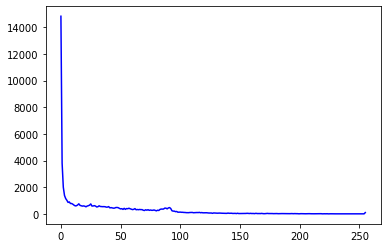

In [12]:
from PIL import Image
import cv2
# 添加中文字体支持
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)

img = array(Image.open('D:\\学习文件\\CV\\test_jpg\\build.jpg'))

hist = cv2.calcHist([img[:,:,0]],[0],None,[256],[0,256])

#绘制直方图：
plt.plot(hist,color='b')

可以发现，这个图的直方图集中在暗区，说明图像偏暗

第二个通道的直方图：

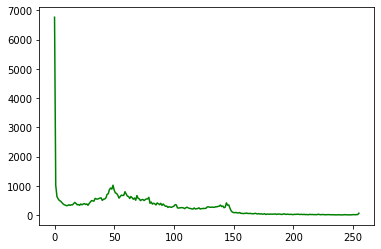

In [122]:
hist = cv2.calcHist([img[:,:,1]],[0],None,[256],[0,256])

plt.plot(hist,color='g')

第三个通道图像的直方图：

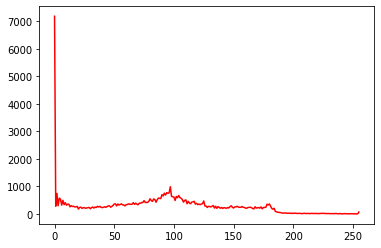

In [124]:
hist = cv2.calcHist([img[:,:,2]],[0],None,[256],[0,256])

plt.plot(hist,color='r')

把三个直方图画到一起：

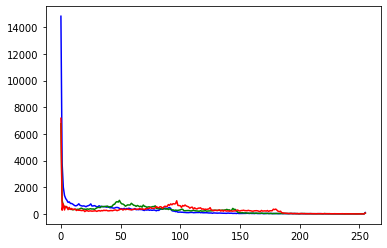

In [125]:
hist = cv2.calcHist([img[:,:,0]],[0],None,[256],[0,256])

plt.plot(hist,color='b')

hist = cv2.calcHist([img[:,:,1]],[0],None,[256],[0,256])

plt.plot(hist,color='g')

hist = cv2.calcHist([img[:,:,2]],[0],None,[256],[0,256])

plt.plot(hist,color='r')

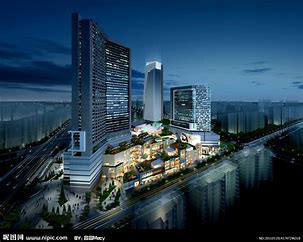

In [128]:
Image.open('D:\\学习文件\\CV\\test_jpg\\build.jpg')

可以发现，第二个通道的直方图相对于另外两个通道，更不均衡，所以这里，只对第一个通道的图像进行均衡化处理：

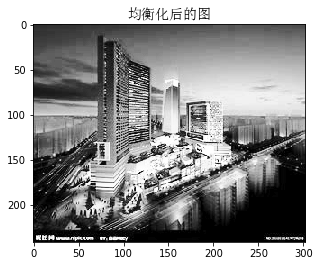

In [14]:
pic = cv2.equalizeHist(img[:,:,1])
#注：用cv2.equalizeHist进行直方图均衡化处理，只能对单通道进行处理。
pic
title(u'均衡化后的图', fontproperties=font)
imshow(pic)

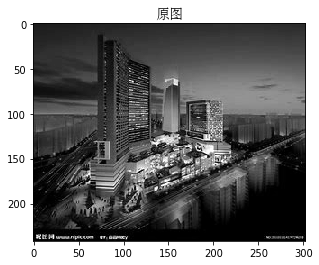

In [146]:
title(u'原图', fontproperties=font)
imshow(img[:,:,1])

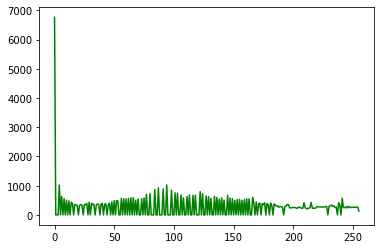

In [133]:
hist = cv2.calcHist([pic],[0],None,[256],[0,256])

plt.plot(hist,color='g')


合并通道，也就是合并为彩色图像：

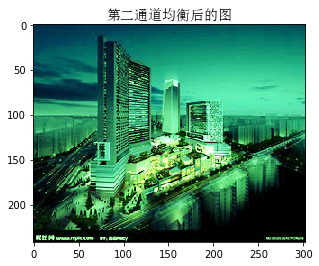

In [15]:
im = cv2.merge([img[:,:,0],pic,img[:,:,2]])
title(u'第二通道均衡后的图', fontproperties=font)
imshow(im)

### 图像平均
    图像平均操作是减少图像噪声的一种简单方式，通常用于艺术特效。我们可以简单地从图像列表中计算出一幅平均图像。假设所有的图像具有相同的大小，我们可以将这些图像简单地相加，然后除以图像的数目，来计算平均图像。下面的函数可以用于计算平均图像，将其添加到 imtool.py 文件里：

In [95]:
def compute_average(imlist):
    """ 计算图像列表的平均图像"""
    # 打开第一幅图像，将其存储在浮点型数组中
    averageim = array(Image.open(imlist[0]), 'f')
    for imname in imlist[1:]:
    try:
      averageim += array(Image.open(imname))
    except:
      print(imname + '...skipped' )
    averageim /= len(imlist)
    # 返回uint8 类型的平均图像
    return array(averageim, 'uint8')

    该函数包括一些基本的异常处理技巧，可以自动跳过不能打开的图像。我们还可以使用 mean() 函数计算平均图像。mean() 函数需要将所有的图像堆积到一个数组中；也就是说，如果有很多图像，该处理方式需要占用很多内存。我们将会在下一节中使用该函数。

### 对图像进行主成分分析
    PCA（Principal Component Analysis，主成分分析）是一个非常有用的降维技巧。它可以在使用尽可能少维数的前提下，尽量多地保持训练数据的信息，在此意义上是一个最佳技巧。即使是一幅 100×100 像素的小灰度图像，也有 10 000 维，可以看成 10 000 维空间中的一个点。一兆像素的图像具有百万维。由于图像具有很高的维数，在许多计算机视觉应用中，我们经常使用降维操作。PCA 产生的投影矩阵可以被视为将原始坐标变换到现有的坐标系，坐标系中的各个坐标按照重要性递减排列。
    为了对图像数据进行 PCA 变换，图像需要转换成一维向量表示。我们可以使用 NumPy 类库中的flatten() 方法进行变换。
    将变平的图像堆积起来，我们可以得到一个矩阵，矩阵的一行表示一幅图像。在计算主方向之前，所有的行图像按照平均图像进行了中心化。我们通常使用 SVD（Singular Value Decomposition，奇异值分解）方法来计算主成分；但当矩阵的维数很大时，SVD 的计算非常慢，所以此时通常不使用 SVD 分解。下面就是 PCA 操作的代码：

In [97]:
from PIL import Image
from numpy import *
""" 主成分分析：
    输入：矩阵X ，其中该矩阵中存储训练数据，每一行为一条训练数据
    返回：投影矩阵（按照维度的重要性排序）、方差和均值"""
def pca(X):  
    num_data,dim = X.shape # 获取维数
    mean_X = X.mean(axis=0)# 数据中心化
    X = X - mean_X
    if dim >num_data:
        # PCA- 使用紧致技巧
        M = dot(X,X.T) # 协方差矩阵
        e,EV = linalg.eigh(M) # 特征值和特征向量
        tmp = dot(X.T,EV).T # 这就是紧致技巧
        V = tmp[::-1] # 由于最后的特征向量是我们所需要的，所以需要将其逆转
        S = sqrt(e)[::-1] # 由于特征值是按照递增顺序排列的，所以需要将其逆转
        for i in range(V.shape[1]):
            V[:,i] /= S
    else:
    U,S,V = linalg.svd(X)# PCA- 使用SVD 方法
    V = V[:num_data] # 仅仅返回前nun_data 维的数据才合理
    # 返回投影矩阵、方差和均值
    return V,S,mean_X
###pca.py存入lib文件中

    该函数首先通过减去每一维的均值将数据中心化，然后计算协方差矩阵对应最大特征值的特征向量，此时可以使用简明的技巧或者 SVD 分解。这里我们使用了 range() 函数，该函数的输入参数为一个整数 n，函数返回整数 0…(n-1) 的一个列表。你也可以使用 arange() 函数来返回一个数组，或者使用 xrange() 函数返回一个产生器（可能会提升速度）。此书中贯穿使用range() 函数。
    如果数据个数小于向量的维数，我们不用 SVD 分解，而是计算维数更小的协方差矩阵 XXT 的特征向量。通过仅计算对应前 k（k 是降维后的维数）最大特征值的特征向量，可以使上面的 PCA 操作更快。由于篇幅所限，有兴趣的读者可以自行探索。矩阵 V 的每行向量都是正交的，并且包含了训练数据方差依次减少的坐标方向。
    接下来对人脸库中部分人脸进行 PCA 变换：

In [ ]:
# import pickle
# from PIL import Image
# from numpy import *
# from pylab import *
# ###？？？
# ### 找代替PCV.tools
# from PCV.tools import imtools,pca

# # Uses sparse pca codepath

# # 获取图像列表和尺寸
# imlist = imtools.get_imlist('D:\\学习文件\\CV\\test_jpg\\build.jpg')
# # open ont image to get the size
# im = array(Image.open('D:\\学习文件\\CV\\test_jpg\\build.jpg\\'+imlist[0]))
# # get the size of the images
# m,n=im.shape[:2]
# # get the number of images
# imnbr=len(imlist)
# print("The number of images is %d" % imnbr)

# # create matrix to store all flattened images
# immatrix = array([array(Image.open(imname)).flatten() for imname in imlist],'f')

# # PCA降维
# V,S,immean=pca.pca(immatrix)

# # 保存均值和主成分
# #f = open('../ch01/font_pca_modes.pkl', 'wb')
# #pickle.dump(immean,f)
# #pickle.dump(V,f)
# #f.close()

# # Show the images (mean and 7 first modes)
# # This gives figure 1-8 (p15) in the book.

# figure()
# gray()
# subplot(241)
# axis('off')
# imshow(immean.reshape(m,n))
# for i in range(7):
#     subplot(2,4,i+2)
#     imshow(V[i].reshape(m,n))
#     axis('off')

# show()

D:\Users\Administrator\Anaconda3\lib\pca.py:23: RuntimeWarning: invalid value encountered in sqrt
  S = sqrt(e)[::-1] # 由于特征值是按照递增顺序排列的，所以需要将其逆转


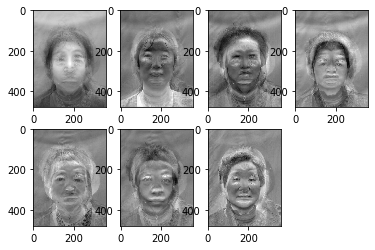

In [6]:
from PIL import Image
from numpy import *
from pylab import *
import pca  
import os
filelist = os.listdir('D:\\学习文件\\CV\\test_jpg\\photo\\') #filelist为D:\\学习文件\\CV\\test_jpg\\路径下的文件名
#把路径和文件名存入imlist中
imlist = []
for i in range(len(filelist)):
    li = ('D:\\学习文件\\CV\\test_jpg\\photo\\'+filelist[i])
    imlist.append(li) 
im = array(Image.open(imlist[0]))
#im = array(Image.open(imlist[0]).convert('L')) # 打开一幅图像，获取其大小 #并转成灰度图
m,n = im.shape[0:2] # 获取图像的大小#灰度图像
imnbr = len(imlist) # 获取图像的数目
# 创建矩阵，保存所有压平后的图像数据
immatrix = array([array(Image.open(im)).flatten()
            for im in imlist],'f')
#immatrix = array([array(Image.open(im).convert('L')).flatten()
            #for im in imlist],'f')
# 执行 PCA 操作
V,S,immean = pca.pca(immatrix)
# 显示一些图像（平均图像（第一个）和前6个模式（具有最大方差的方向模式））
figure()
gray()
subplot(2,4,1) 
imshow(immean.reshape(m,n))
for i in range(6):
  subplot(2,4,i+2)
  imshow(V[i].reshape(m,n))
show()

In [7]:
V,S,immean
#投影矩阵、方差和均值

(array([[-0.00116053, -0.00130986, -0.00125018, ...,  0.00189178,
          0.0022966 ,  0.        ],
        [-0.00043289, -0.00041154, -0.00027297, ...,  0.00235821,
          0.00233559,  0.        ],
        [-0.00162129, -0.00155168, -0.00168326, ...,  0.00053618,
          0.00059362,  0.        ],
        ...,
        [-0.00037515, -0.00069099, -0.00104482, ..., -0.0007476 ,
         -0.00054238,  0.        ],
        [-0.00046505, -0.00067101, -0.00083501, ..., -0.00204348,
         -0.00159317,  0.        ],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]], dtype=float32),
 array([20501.912, 18783.156, 17409.6  , 14444.134, 13552.508, 11291.813,
              nan], dtype=float32),
 array([149.14285, 149.42857, 151.71428, ...,  66.     ,  65.     ,
          0.     ], dtype=float32))

    注意，图像需要从一维表示重新转换成二维图像；可以使用 reshape() 函数。如上图所示，运行该例子会在一个绘图窗口中显示 4 个图像。这里我们使用了 PyLab 库的 subplot() 函数在一个窗口中放置多个图像。

### Pickle模块
    如果想要保存一些结果或者数据以方便后续使用，Python 中的 pickle 模块非常有用。pickle模块可以接受几乎所有的 Python 对象，并且将其转换成字符串表示，该过程叫做封装（pickling）。从字符串表示中重构该对象，称为拆封（unpickling）。这些字符串表示可以方便地存储和传输。
    我们来看一个例子。假设想要保存上一节字体图像的平均图像和主成分，可以这样来完成：

In [110]:
# 保存均值和主成分数据
f = open('font_pca_modes.pkl','wb')
pickle.dump(immean,f)
pickle.dump(V,f)
f.close()

    在上述例子中，许多对象可以保存到同一个文件中。pickle 模块中有很多不同的协议可以生成 .pkl 文件；如果不确定的话，最好以二进制文件的形式读取和写入。在其他 Python 会话中载入数据，只需要如下使用 load() 方法：

In [111]:
# 载入均值和主成分数据
f = open('font_pca_modes.pkl','rb')
immean = pickle.load(f)
V = pickle.load(f)
f.close()

    注意，载入对象的顺序必须和先前保存的一样。Python 中有个用 C 语言写的优化版本，叫做cpickle 模块，该模块和标准 pickle 模块完全兼容。关于 pickle 模块的更多内容，参见pickle 模块文档页 http://docs.python.org/library/pickle.html。
    在本书接下来的章节中，我们将使用 with 语句处理文件的读写操作。这是 Python 2.5 引入的思想，可以自动打开和关闭文件（即使在文件打开时发生错误）。下面的例子使用 with() 来实现保存和载入操作：

In [112]:
# 打开文件并保存
with open('font_pca_modes.pkl', 'wb') as f:
  pickle.dump(immean,f)
  pickle.dump(V,f)

In [113]:
# 打开文件并载入
with open('font_pca_modes.pkl', 'rb') as f:
  immean = pickle.load(f)
  V = pickle.load(f)

    上面的例子乍看起来可能很奇怪，但 with() 确实是个很有用的思想。如果你不喜欢它，可以使用之前的 open 和 close 函数。
    作为 pickle 的一种替代方式，NumPy 具有读写文本文件的简单函数。如果数据中不包含复杂的数据结构，比如在一幅图像上点击的点列表，NumPy 的读写函数会很有用。保存一个数组 x 到文件中，可以使用：savetxt('test.txt',x,'%i')，最后一个参数表示应该使用整数格式。类似地，读取可以使用：x = loadtxt('test.txt')。
    你可以从在线文档 http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html 了解更多内容。
    最后，NumPy 有专门用于保存和载入数组的函数。你可以在上面的在线文档里查看关于 save() 和 load() 的更多内容。

## SciPy
    SciPy（http://scipy.org/） 是 建 立 在 NumPy 基 础 上， 用 于 数 值 运 算 的 开 源 工 具 包。SciPy 提供很多高效的操作，可以实现数值积分、优化、统计、信号处理，以及对我们来说最重要的图像处理功能。接下来，本节会介绍 SciPy 中大量有用的模块。SciPy 是个开源工具包，可以从 http://scipy.org/Download 下载。

### 图像模糊
图像的高斯模糊是非常经典的图像卷积例子。本质上，图像模糊就是将（灰度）图像I和一个高斯核进行卷积操作：$$ I_\sigma = I*G_\sigma $$其中，*表示卷积；$ G_\sigma $表示标准差为$ \sigma $的二维高斯核，定义为：$ G_\sigma = \frac{1}{2\pi\sigma^2}e^{\frac{-(x^2+y^2)}{2\sigma}} $
高斯模糊通常是其他图像处理操作的一部分，比如像图像插值操作，兴趣点计算以及很多其他应用。

滤波操作模块——scipy.ndimage.filters
该模块可以使用快速一维分离的方式来计算卷积，使用方式如下：

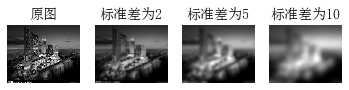

In [2]:
from PIL import Image
from numpy import *
from pylab import *
from scipy.ndimage import filters

# 添加中文字体支持
from matplotlib.font_manager import FontProperties
font=FontProperties(fname=r"c:\windows\fonts\SimSun.ttc",size=14)

im=array(Image.open('D:\\学习文件\\CV\\test_jpg\\build.jpg').convert('L'))

figure()
gray()
axis('off')
subplot(141)
axis('off')
title(u'原图',fontproperties=font)
imshow(im)

for bi,blur in enumerate([2,5,10]):
    im2=zeros(im.shape)
    im2=filters.gaussian_filter(im,blur)
    im2=np.uint8(im2)
    imNum=str(blur)
    subplot(1,4,2+bi)
    axis('off')
    title(u'标准差为'+imNum,fontproperties=font)
    imshow(im2)
show()

上面第一幅图为待模糊图像，第二幅用高斯标准差为2进行模糊，第三幅用高斯标准差为5进行模糊，最后一幅用高斯标准差为10进行模糊。关于该模块的使用以及参数选择的更多细节，可以参阅SciPy scipy.ndimage文档。

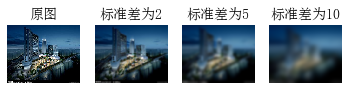

In [11]:
from PIL import Image
from numpy import *
from pylab import *
from scipy.ndimage import filters

# 添加中文字体支持
from matplotlib.font_manager import FontProperties
font=FontProperties(fname=r"c:\windows\fonts\SimSun.ttc",size=14)

#彩色图像
im=array(Image.open('D:\\学习文件\\CV\\test_jpg\\build.jpg'))

figure()
gray()
axis('off')
subplot(141)
axis('off')
title(u'原图',fontproperties=font)
imshow(im)

# for bi,blur in enumerate([2,5,10]):
#     im2=zeros(im.shape)
#     im2=filters.gaussian_filter(im,blur)
#     im2=np.uint8(im2)
#     imNum=str(blur)
#     subplot(1,4,2+bi)
#     axis('off')
#     title(u'标准差为'+imNum,fontproperties=font)
#     imshow(im2)

#因为是彩色图像，所以分别对三个通道进行模糊
for bi, blur in enumerate([2, 5, 10]):
 im2 = zeros(im.shape)
 for i in range(3):
   im2[:, :, i] = filters.gaussian_filter(im[:, :, i], blur)
 im2 = np.uint8(im2)
 subplot(1, 4,  2 + bi)
 axis('off')
 title(u'标准差为'+str(blur),fontproperties=font)
 imshow(im2)

show()

### 图像导数
在很多应用中图像强度的变化情况是非常重要的信息。强度的变化可以用灰度图像 I（对于彩色图像，通常对每个颜色通道分别计算导数）的$x$和$y$方向导数 $I_x$和$I_y$进行描述。
图像的梯度向量为$\nabla I = [I_x^2\;,I_y^2]^T$，描述图像在每个像素点上强度变化最大的方向。
$\nabla$具体介绍：https://zhidao.baidu.com/question/693834358985017524.html 。梯度有两个重要的属性

1.梯度的大小：$\lvert\nabla I\lvert= \sqrt{I_x^2+I_y^2}$

它描述了图像强度变化的强弱

2.梯度的角度：$\alpha=\arctan2(I_x\;,I_y)$

它描述了图像中在每个点（像素）上强度变化最大的方向。NumPy中的arctan2()函数返回弧度表示的有符号角度，角度的变化区间为−π...π。

我们可以用离散近似的方式来计算图像的导数。图像导数大多数可以通过卷积简单地实现：$I_x = I∗D_x$和$I_y = I∗D_y$
对于$D_x$和D_y$，通常选择Prewitt滤波器:

$$
D_{x}=
\left[ 
\begin{array}{c}{-1,0,1} \\ 
{-1,0,1} \\ 
{-1,0,1}
\end{array}
\right]
$$

和
$$
D_{y}=
\left[ 
\begin{array}{c}{-1,-1,-1} \\ 
{0,0,0} \\ 
{1,1,1}
\end{array}
\right]
$$
或Sobel滤波器:
$$
D_{x}=
\left[ 
\begin{array}{c}{-1,0,1} \\ 
{-2,0,2} \\ 
{-1,0,1}
\end{array}
\right]
$$
和
$$
D_{y}=
\left[ 
\begin{array}{c}{-1,-2,-1} \\ 
{0,0,0} \\ 
{1,2,1}
\end{array}
\right]
$$
这些导数滤波器可以使用scipy.ndimage.filters模块的标准卷积操作来简单实现,例如：

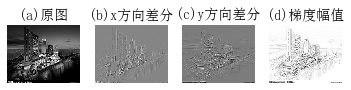

In [3]:
from PIL import Image
from pylab import *
from scipy.ndimage import  filters
import numpy

# 添加中文字体支持
from matplotlib.font_manager import FontProperties
font=FontProperties(fname=r"c:\windows\fonts\SimSun.ttc",size=14)

im=array(Image.open('D:\\学习文件\\CV\\test_jpg\\build.jpg').convert('L'))
gray()

subplot(141)
axis('off')
title(u'(a)原图',fontproperties=font)
imshow(im)

# sobel derivative filters
imx=zeros(im.shape)
filters.sobel(im,1,imx)
subplot(142)
axis('off')
title(u'(b)x方向差分',fontproperties=font)
imshow(imx)

imy=zeros(im.shape)
filters.sobel(im,0,imy)
subplot(143)
axis('off')
title(u'(c)y方向差分',fontproperties=font)
imshow(imy)

mag=255-numpy.sqrt(imx**2+imy**2)
subplot(144)
title(u'(d)梯度幅值',fontproperties=font)
axis('off')
imshow(mag)

show()

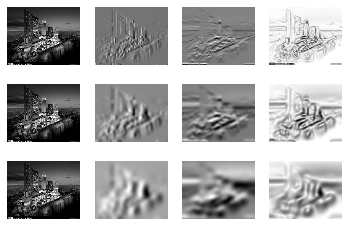

In [4]:
#高斯差分：
from PIL import Image
from pylab import *
from scipy.ndimage import filters
import numpy

# 添加中文字体支持
#from matplotlib.font_manager import FontProperties
#font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)

def imx(im, sigma):
    imgx = zeros(im.shape)
    filters.gaussian_filter(im, sigma, (0, 1), imgx)
    return imgx


def imy(im, sigma):
    imgy = zeros(im.shape)
    filters.gaussian_filter(im, sigma, (1, 0), imgy)
    return imgy


def mag(im, sigma):
    # there's also gaussian_gradient_magnitude()
    #mag = numpy.sqrt(imgx**2 + imgy**2)
    imgmag = 255 - numpy.sqrt(imgx ** 2 + imgy ** 2)
    return imgmag


im = array(Image.open('D:\\学习文件\\CV\\test_jpg\\build.jpg').convert('L'))
figure()
gray()

sigma = [2, 5, 10]

for i in  sigma:
    subplot(3, 4, 4*(sigma.index(i))+1)
    axis('off')
    imshow(im)
    imgx=imx(im, i)
    subplot(3, 4, 4*(sigma.index(i))+2)
    axis('off')
    imshow(imgx)
    imgy=imy(im, i)
    subplot(3, 4, 4*(sigma.index(i))+3)
    axis('off')
    imshow(imgy)
    imgmag=mag(im, i)
    subplot(3, 4, 4*(sigma.index(i))+4)
    axis('off')
    imshow(imgmag)

show()

### 形态学：对象计数
形态学（或数学形态学）是度量和分析基本形状的图像处理方法的基本框架与集合。形态学通常用于处理二值图像，但是也能够用于灰度图像。二值图像是指图像的每个像素只能取两个值，通常是 0 和 1。二值图像通常是，在计算物体的数目，或者度量其大小时，对一幅图像进行阈值化后的结果。可以从 http://en.wikipedia.org/wiki/Mathematical_morphology 大体了解形态学及其处理图像的方式。
scipy.ndimage 中的 morphology 模块可以实现形态学操作
scipy.ndimage 中的measurements 模块来实现二值图像的计数和度量功能
下面通过一个简单的例子介绍如何使用它们：

In [5]:
from scipy.ndimage import measurements,morphology

# 载入图像，然后使用阈值化操作，以保证处理的图像为二值图像
im = array(Image.open('D:\\学习文件\\CV\\test_jpg\\build.jpg').convert('L'))
im = 1*(im<128)

labels, nbr_objects = measurements.label(im)
print ("Number of objects:", nbr_objects)

Number of objects: 114


1.上面的脚本首先载入该图像，通过阈值化方式来确保该图像是二值图像。通过和 1 相乘，脚本将布尔数组转换成二进制表示。

2.然后，我们使用 label() 函数寻找单个的物体，并且按照它们属于哪个对象将整数标签给像素赋值。

3.图 1-12b 是 labels 数组的图像。图像的灰度值表示对象的标签。可以看到，在一些对象之间有一些小的连接。进行二进制开（binary open）操作，我们可以将其移除：

In [7]:
# 形态学开操作更好地分离各个对象
im_open = morphology.binary_opening(im,ones((9,5)),iterations=2)

labels_open, nbr_objects_open = measurements.label(im_open)
print("Number of objects:", nbr_objects_open)

Number of objects: 3


    ·binary_opening() 函数的第二个参数指定一个数组结构元素。
    ·该数组表示以一个像素为中心时，使用哪些相邻像素。
    ·在这种情况下，我们在 y 方向上使用 9 个像素（上面 4 个像素、像素本身、下面 4 个像素），在 x 方向上使用 5 个像素。你可以指定任意数组为结构元素，数组中的非零元素决定使用哪些相邻像素。
    ·参数 iterations 决定执行该操作的次数。你可以尝试使用不同的迭代次数 iterations 值，看一下对象的数目如何变化。
    ·可以在图 1-12c 与图 1-12d 中查看经过开操作后的图像，以及相应的标签图像。
    ·binary_closing() 函数实现相反的操作。
    ·我们将该函数和在 morphology 和 measurements 模块中的其他函数的用法留作练习。你可以从 scipy.ndimage 模块文档 中了解关于这些函数的更多知识。

Number of objects: 114
Number of objects: 3


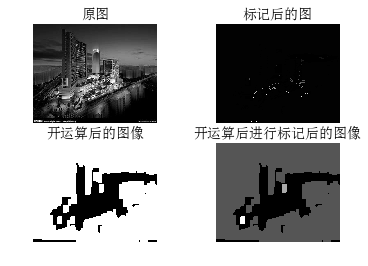

In [23]:
from PIL import Image
from numpy import *
from scipy.ndimage import measurements, morphology
from pylab import *

"""   This is the morphology counting objects example in Section 1.4.  """

# 添加中文字体支持
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)

# load image and threshold to make sure it is binary
figure()
gray()
im = array(Image.open('D:\\学习文件\\CV\\test_jpg\\build.jpg').convert('L'))
subplot(221)
imshow(im)
axis('off')
title(u'原图', fontproperties=font)
im = (im < 128)

labels, nbr_objects = measurements.label(im)
print ("Number of objects:", nbr_objects)
subplot(222)
imshow(labels)
axis('off')
title(u'标记后的图', fontproperties=font)

# morphology - opening to separate objects better
im_open = morphology.binary_opening(im, ones((9, 5)), iterations=2)
subplot(223)
imshow(im_open)
axis('off')
title(u'开运算后的图像', fontproperties=font)

labels_open, nbr_objects_open = measurements.label(im_open)
print ("Number of objects:", nbr_objects_open)
subplot(224)
imshow(labels_open)
axis('off')
title(u'开运算后进行标记后的图像', fontproperties=font)

show()

### 有用的SciPy模块
SciPy 中包含一些用于输入和输出的实用模块。下面介绍其中两个模块：io 和 misc。

1.读写mat文件

存储mat格式文件：savemat()函数

In [44]:
import numpy, scipy.io
my_data = [1,2,3,4]
scipy.io.savemat('test.mat', mdict={'my_data': my_data})

In [ ]:
或者直接存成字典

In [45]:
data1 = {}
data1['x'] = 4
scipy.io.savemat('test2.mat',data1)

读取mat格式文件：loadmat()函数

In [46]:
from scipy import io
data = scipy.io.loadmat('test.mat')

In [47]:
data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon Jun  3 15:54:09 2019',
 '__version__': '1.0',
 'my_data': array([[1, 2, 3, 4]])}

In [48]:
data1

{'x': 4}

2.以图像形式保存数组:imsave函数

我们需要对图像进行操作，以及使用数组对象进行运算，这些都需要以图像的形式保存数组，换句话说就是将数组直接保存为图像文件。

In [75]:
#from scipy.misc import imsave
#注：原书中的“imsave”函数被弃用，“imsave”在SciPy 1.0.0中被废弃，将在1.2.0中删除，用“imageio.imwrite ' '代替。
#读入图像并存为数组
from PIL import Image
from numpy import *
import imageio
im = array(Image.open('D:\\学习文件\\CV\\test_jpg\\build.jpg'))
#将数组存为图像
imageio.imwrite('test.jpg',im)

## 高级示例：图像去噪

图像去噪是在去除图像噪声的同时，尽可能地保留图像细节和结构的处理技术。

这里使用 ROF（Rudin-Osher-Fatemi）去噪模型。

图像去噪对于很多应用来说都非常重要；这些应用范围很广，小到让你的假期照片看起来更漂亮，大到提高卫星图像的质量。

——相当于我们现在的磨皮操作。

ROF 模型具有很好的性质：使处理后的图像更平滑，同时保持图像边缘和结构信息。

ROF函数代码实现：

In [85]:
#定义ROF 模型函数
from numpy import *
def denoise(im,U_init,tolerance=0.1,tau=0.125,tv_weight=100):
    """ 使用 A. Chambolle（2005）在公式（11）中的计算步骤实现 Rudin-Osher-Fatemi（ROF）去噪模型
    输入：含有噪声的输入图像（灰度图像）、U的初始值、TV 正则项权值、步长、停业条件
    输出：去噪和去除纹理后的图像、纹理残留 """
    m,n = im.shape # 噪声图像的大小
    # 初始化
    U = U_init
    Px = im # 对偶域的x分量
    Py = im # 对偶域的y分量
    error = 1
    while (error > tolerance):
        Uold = U  # 原始变量的梯度
        GradUx = roll(U,-1,axis=1)-U # 变量 U 梯度的x分量
        GradUy = roll(U,-1,axis=0)-U # 变量 U 梯度的y分量
        # 更新对偶变量
        PxNew = Px + (tau/tv_weight)*GradUx
        PyNew = Py + (tau/tv_weight)*GradUy
        NormNew = maximum(1,sqrt(PxNew**2+PyNew**2))
        Px = PxNew/NormNew # 更新x分量（对偶）
        Py = PyNew/NormNew # 更新y分量（对偶）
        # 更新原始变量
        RxPx = roll(Px,1,axis=1) # 对x分量进行向右x轴平移
        RyPy = roll(Py,1,axis=0) # 对y分量进行向右y轴平移
        DivP = (Px-RxPx)+(Py-RyPy) # 对偶域的散度
        U = im + tv_weight*DivP # 更新原始变量
        # 更新误差
        error = linalg.norm(U-Uold)/sqrt(n*m);
    return U,im-U # 去噪后的图像和纹理残余

降噪综合示例：

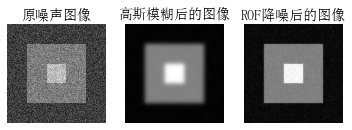

In [86]:
from pylab import *
from numpy import *
from numpy import random
from scipy.ndimage import filters
from scipy.misc import imsave
from PCV.tools import rof

""" This is the de-noising example using ROF in Section 1.5. """

# 添加中文字体支持
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)

# create synthetic image with noise
im = zeros((500,500))
im[100:400,100:400] = 128
im[200:300,200:300] = 255
im = im + 30*random.standard_normal((500,500))

U,T = rof.denoise(im,im)
G = filters.gaussian_filter(im,10)


# save the result
#imsave('synth_original.pdf',im)
#imsave('synth_rof.pdf',U)
#imsave('synth_gaussian.pdf',G)


# plot
figure()
gray()

subplot(1,3,1)
imshow(im)
#axis('equal')
axis('off')
title(u'原噪声图像', fontproperties=font)

subplot(1,3,2)
imshow(G)
#axis('equal')
axis('off')
title(u'高斯模糊后的图像', fontproperties=font)

subplot(1,3,3)
imshow(U)
#axis('equal')
axis('off')
title(u'ROF降噪后的图像', fontproperties=font)

show()

其中第一幅图示原噪声图像，中间一幅图示用标准差为10进行高斯模糊后的结果，最右边一幅图是用ROF降噪后的图像。上面原噪声图像是模拟出来的图像，现在我们在真实的图像上进行测试：

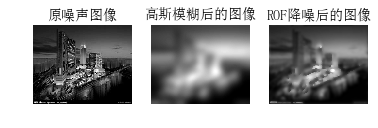

In [27]:
from PIL import Image
from pylab import *
from numpy import *
from numpy import random
from scipy.ndimage import filters
from scipy.misc import imsave
from PCV.tools import rof

""" This is the de-noising example using ROF in Section 1.5. """

# 添加中文字体支持
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)

im = array(Image.open('D:\\学习文件\\CV\\test_jpg\\build.jpg').convert('L'))

U,T = rof.denoise(im,im)
G = filters.gaussian_filter(im,10)


# save the result
#imsave('synth_original.pdf',im)
#imsave('synth_rof.pdf',U)
#imsave('synth_gaussian.pdf',G)


# plot
figure()
gray()

subplot(1,3,1)
imshow(im)
#axis('equal')
axis('off')
title(u'原噪声图像', fontproperties=font)

subplot(1,3,2)
imshow(G)
#axis('equal')
axis('off')
title(u'高斯模糊后的图像', fontproperties=font)

subplot(1,3,3)
imshow(U)
#axis('equal')
axis('off')
title(u'ROF降噪后的图像', fontproperties=font)

show()

ROF降噪能够保持边缘和图像结构